In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.stem.porter import PorterStemmer
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!unzip train.zip

Archive:  train.zip
  inflating: train.csv               


In [ ]:
!unzip test.zip

Archive:  test.zip
  inflating: test.csv                


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
dft = pd.read_csv('test.csv')

In [ ]:
df.tail(2)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0
20971,20972,Why optional stopping is a problem for Bayesians,"Recently, optional stopping has been a subje...",0,0,1,1,0,0


In [ ]:
df.ABSTRACT.iloc[5]

'  Let $\\Omega \\subset \\mathbb{R}^n$ be a bounded domain satisfying a\nHayman-type asymmetry condition, and let $ D $ be an arbitrary bounded domain\nreferred to as "obstacle". We are interested in the behaviour of the first\nDirichlet eigenvalue $ \\lambda_1(\\Omega \\setminus (x+D)) $. First, we prove an\nupper bound on $ \\lambda_1(\\Omega \\setminus (x+D)) $ in terms of the distance\nof the set $ x+D $ to the set of maximum points $ x_0 $ of the first Dirichlet\nground state $ \\phi_{\\lambda_1} > 0 $ of $ \\Omega $. In short, a direct\ncorollary is that if \\begin{equation} \\mu_\\Omega := \\max_{x}\\lambda_1(\\Omega\n\\setminus (x+D)) \\end{equation} is large enough in terms of $ \\lambda_1(\\Omega)\n$, then all maximizer sets $ x+D $ of $ \\mu_\\Omega $ are close to each maximum\npoint $ x_0 $ of $ \\phi_{\\lambda_1} $.\nSecond, we discuss the distribution of $ \\phi_{\\lambda_1(\\Omega)} $ and the\npossibility to inscribe wavelength balls at a given point in $ \\Omega $.\nFi

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
     
    return input_txt 

df['ABSTRACT'] = np.vectorize(remove_pattern)(df['ABSTRACT'], "@[\w]*")

df.ABSTRACT.iloc[5]

'  Let $\\Omega \\subset \\mathbb{R}^n$ be a bounded domain satisfying a\nHayman-type asymmetry condition, and let $ D $ be an arbitrary bounded domain\nreferred to as "obstacle". We are interested in the behaviour of the first\nDirichlet eigenvalue $ \\lambda_1(\\Omega \\setminus (x+D)) $. First, we prove an\nupper bound on $ \\lambda_1(\\Omega \\setminus (x+D)) $ in terms of the distance\nof the set $ x+D $ to the set of maximum points $ x_0 $ of the first Dirichlet\nground state $ \\phi_{\\lambda_1} > 0 $ of $ \\Omega $. In short, a direct\ncorollary is that if \\begin{equation} \\mu_\\Omega := \\max_{x}\\lambda_1(\\Omega\n\\setminus (x+D)) \\end{equation} is large enough in terms of $ \\lambda_1(\\Omega)\n$, then all maximizer sets $ x+D $ of $ \\mu_\\Omega $ are close to each maximum\npoint $ x_0 $ of $ \\phi_{\\lambda_1} $.\nSecond, we discuss the distribution of $ \\phi_{\\lambda_1(\\Omega)} $ and the\npossibility to inscribe wavelength balls at a given point in $ \\Omega $.\nFi

In [ ]:
dft.head(2)

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8989 entries, 0 to 8988
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        8989 non-null   int64 
 1   TITLE     8989 non-null   object
 2   ABSTRACT  8989 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.8+ KB


In [ ]:
train_sentences=[]
stopwords_ = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords_))

153


In [ ]:
train_sentences=[]
with open('train.csv', 'r') as trainfile:
  reader = csv.reader(trainfile, delimiter=',')
  next(reader)
  for row in reader:
    sentence = row[2]
    for word in stopwords_:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
      sentence = sentence.lower()
      sentence = sentence.replace("\\", " ")
      sentence = sentence.replace("/", " ")
      sentence = sentence.replace("$", " ")
      sentence = sentence.replace("+", " ")
      sentence = sentence.replace("_", " ")
      sentence = sentence.replace("^", " ")
      sentence = sentence.replace("{", " ")
      sentence = sentence.replace("}", " ")
      sentence = sentence.replace("(", " ")
      sentence = sentence.replace(")", " ")
      sentence = sentence.replace(":", " ")
      sentence = sentence.replace("=", " ")
      sentence = sentence.replace(">", " ")
      sentence = sentence.replace("<", " ")
      sentence = sentence.replace("\n", " ")
      sentence = PorterStemmer().stem(sentence)
    train_sentences.append(sentence)
    

In [ ]:
test_sentences=[]
with open('test.csv', 'r') as testfile:
  reader_ = csv.reader(testfile, delimiter=',')
  next(reader_)
  for row in reader_:
    sentence = row[2]
    for word in stopwords_:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
      sentence = sentence.lower()
      sentence = sentence.replace("\\", " ")
      sentence = sentence.replace("/", " ")
      sentence = sentence.replace("$", " ")
      sentence = sentence.replace("+", " ")
      sentence = sentence.replace("_", " ")
      sentence = sentence.replace("^", " ")
      sentence = sentence.replace("{", " ")
      sentence = sentence.replace("}", " ")
      sentence = sentence.replace("(", " ")
      sentence = sentence.replace(")", " ")
      sentence = sentence.replace(":", " ")
      sentence = sentence.replace("=", " ")
      sentence = sentence.replace(">", " ")
      sentence = sentence.replace("<", " ")
      sentence = sentence.replace("\n", " ")
      sentence = PorterStemmer().stem(sentence)
    test_sentences.append(sentence)
    

In [ ]:
labels = df[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

In [ ]:
labels

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
20967,1,1,0,0,0,0
20968,0,1,0,0,0,0
20969,1,0,0,0,0,0
20970,0,0,1,1,0,0


In [ ]:
label_num = labels.values

In [ ]:
label_num

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
#vocab_size = 20000
embedding_dim = 100
max_length = 500
trunc_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
vocab_size=len(word_index)
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(train_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? stochastic landau lifshitz gilbert <OOV> equation coupled maxwell equations called stochastic <OOV> system describes creation domain walls vor

In [ ]:
#model = tf.keras.Sequential([
 #   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  #  tf.keras.layers.Flatten(),
   # tf.keras.layers.Dense(6, activation='relu'),
    #tf.keras.layers.Dense(6, activation='sigmoid')
#])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

In [ ]:
#num_epochs = 30
#history=model.fit(padded, label_num, epochs=num_epochs)

In [ ]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-08-20 16:24:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   156MB/s    in 2.1s    

2020-08-20 16:24:16 (156 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 10
history=model1.fit(padded, label_num, epochs=num_epochs)

Epoch 1/10
656/656 [==============================] - 95s 145ms/step - loss: 0.1426 - accuracy: 0.7919
Epoch 2/10
656/656 [==============================] - 95s 145ms/step - loss: 0.1361 - accuracy: 0.7995
Epoch 3/10
656/656 [==============================] - 95s 145ms/step - loss: 0.1340 - accuracy: 0.7991
Epoch 4/10
656/656 [==============================] - 95s 145ms/step - loss: 0.1325 - accuracy: 0.8020
Epoch 5/10
656/656 [==============================] - 98s 149ms/step - loss: 0.1289 - accuracy: 0.8027
Epoch 6/10
656/656 [==============================] - 95s 145ms/step - loss: 0.1261 - accuracy: 0.8060
Epoch 7/10
656/656 [==============================] - 96s 146ms/step - loss: 0.1224 - accuracy: 0.8074
Epoch 8/10
656/656 [==============================] - 95s 145ms/step - loss: 0.1205 - accuracy: 0.8111
Epoch 9/10
656/656 [==============================] - 95s 145ms/step - loss: 0.1174 - accuracy: 0.8145
Epoch 10/10
656/656 [==============================] - 96s 146ms/step - l

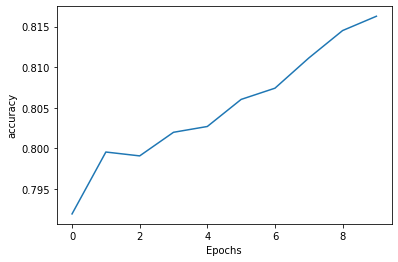

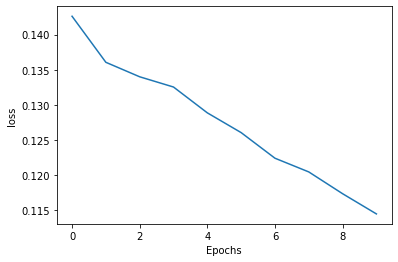

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  #plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
a

array([[2.9095829e-05, 3.5731962e-15, 3.0170977e-03, 1.0000000e+00,
        3.6112212e-06, 9.6922236e-12],
       [2.8240488e-06, 9.9995649e-01, 7.7573180e-01, 2.1740401e-10,
        2.0219033e-10, 4.6699643e-03],
       [9.9988365e-01, 5.1445296e-11, 4.9933062e-09, 7.6237798e-02,
        5.4090394e-09, 2.3493300e-22],
       ...,
       [2.0832032e-02, 2.9362738e-03, 1.8862156e-20, 1.6408890e-02,
        9.9604905e-01, 5.3877480e-12],
       [9.9999309e-01, 1.9569025e-17, 3.4325268e-07, 9.9996257e-01,
        1.4069527e-09, 9.0599831e-26],
       [9.9818510e-01, 1.5747044e-05, 4.2422473e-02, 3.5443321e-05,
        1.0451592e-10, 7.5314554e-16]], dtype=float32)

In [ ]:
a = model.predict(test_padded)

In [ ]:
a[a>=0.1]=1
a[a<0.01]=0

In [ ]:
b = pd.DataFrame(a)
b.columns = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
b=b.astype(int)
y = dft['ID']
df1 = pd.concat([y, b], axis=1)

In [ ]:
fr = open("AV_nlp23.csv", "w")
df1.to_csv(r'AV_nlp23.csv', index = False)
fr.close()